In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("cancer.csv")
display(df)

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         569 non-null    int64  
 1   Diagnosis                  569 non-null    object 
 2   Radius (mean)              569 non-null    float64
 3   Texture (mean)             569 non-null    float64
 4   Perimeter (mean)           569 non-null    float64
 5   Area (mean)                569 non-null    float64
 6   Smoothness (mean)          569 non-null    float64
 7   Compactness (mean)         569 non-null    float64
 8   Concavity (mean)           569 non-null    float64
 9   Concave points (mean)      569 non-null    float64
 10  Symmetry (mean)            569 non-null    float64
 11  Fractal dimension (mean)   569 non-null    float64
 12  Radius (se)                569 non-null    float64
 13  Texture (se)               569 non-null    float64

In [83]:
df.columns

Index(['Id', 'Diagnosis', 'Radius (mean)', 'Texture (mean)',
       'Perimeter (mean)', 'Area (mean)', 'Smoothness (mean)',
       'Compactness (mean)', 'Concavity (mean)', 'Concave points (mean)',
       'Symmetry (mean)', 'Fractal dimension (mean)', 'Radius (se)',
       'Texture (se)', 'Perimeter (se)', 'Area (se)', 'Smoothness (se)',
       'Compactness (se)', 'Concavity (se)', 'Concave points (se)',
       'Symmetry (se)', 'Fractal dimension (se)', 'Radius (worst)',
       'Texture (worst)', 'Perimeter (worst)', 'Area (worst)',
       'Smoothness (worst)', 'Compactness (worst)', 'Concavity (worst)',
       'Concave points (worst)', 'Symmetry (worst)',
       'Fractal dimension (worst)'],
      dtype='object')

In [84]:
df.drop(columns=["Id"], inplace=True)

In [85]:
X = df.values[: , 1:31]
y = df.values[: , 0]

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
len(X_train), len(X_test), len(y_train), len(y_test)

(398, 171, 398, 171)

In [87]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=50, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [88]:
from sklearn.metrics import classification_report
model_predict = modelo.predict(X_test)

print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           B       0.95      1.00      0.97       107
           M       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [89]:
from sklearn.metrics import accuracy_score
y_predict = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_predict)
print("A acuracia é:", acuracia)

A acuracia é: 0.9649122807017544


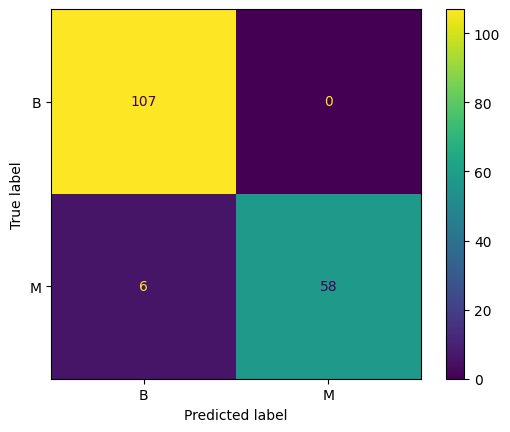

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matriz = confusion_matrix(y_test, y_predict)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)